In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [29]:
test=pd.read_csv('test.csv')

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test.shape

(418, 11)

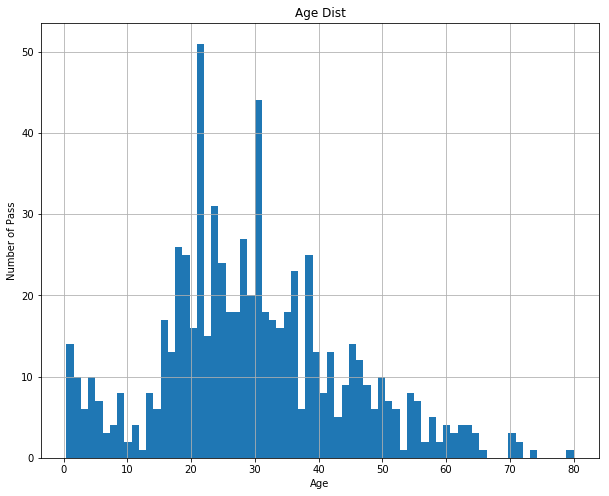

In [11]:
plt.figure(figsize=(10,8))
train['Age'].hist(bins=70)
plt.title("Age Dist")
plt.xlabel('Age')
plt.ylabel('Number of Pass')
plt.show()

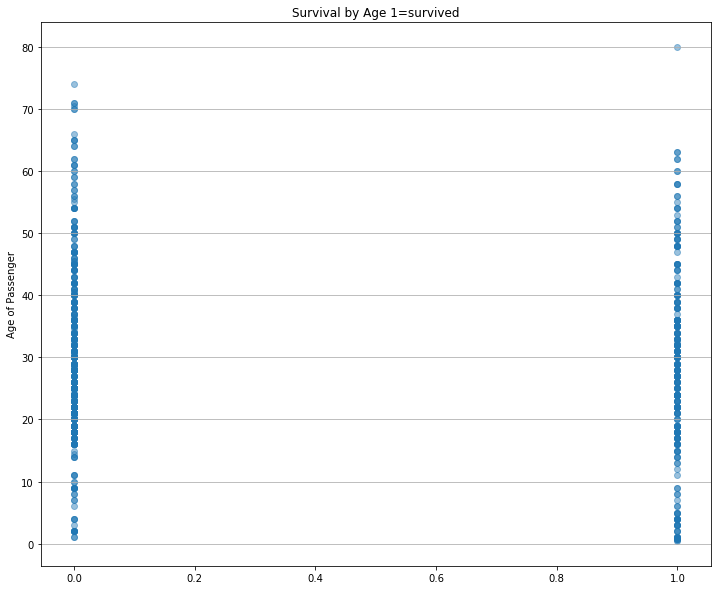

In [12]:
plt.figure(figsize=(12,10))
plt.scatter(train.Survived,train.Age,alpha=.45)
plt.ylabel('Age of Passenger')
plt.title('Survival by Age 1=survived')
plt.grid(b=True,which='major',axis='y')
plt.show()



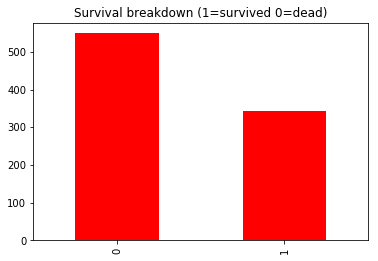

In [13]:
train.Survived.value_counts().plot(kind='bar',color='red')
plt.title("Survival breakdown (1=survived 0=dead)")
plt.show()

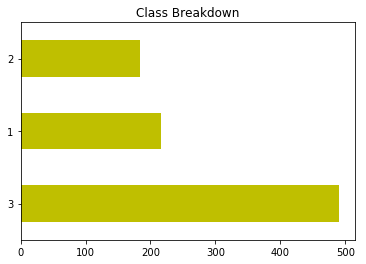

In [14]:
train.Pclass.value_counts().plot(kind='barh',color='y')
plt.title("Class Breakdown")
plt.show()

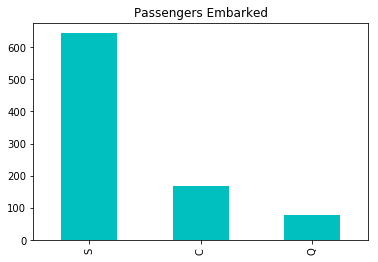

In [16]:
train.Embarked.value_counts().plot(kind='bar',color='c')
plt.title("Passengers Embarked")
plt.show()

In [30]:
test['Sex']=test['Sex'].apply(lambda sex:1 if sex=='male' else 0)

In [31]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [32]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
train['Sex']=train['Sex'].apply(lambda sex:1 if sex=='male' else 0)

In [27]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [28]:
train['Fare']=train['Fare'].fillna(train['Fare'].mean())

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [35]:
cols=["Pclass","Sex","Age"]

In [37]:
survived=train['Survived'].values

In [39]:
data_train = train[cols].values

In [40]:
data_test = test[cols].values

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(data_train,survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
predict = model.predict(data_test)

In [45]:
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [46]:
#model persistance 
import pickle as pkl

In [47]:
persist_model = pkl.dumps(model)

In [48]:
persist_model

b'\x80\x03csklearn.linear_model.logistic\nLogisticRegression\nq\x00)\x81q\x01}q\x02(X\n\x00\x00\x00intercept_q\x03cnumpy.core.multiarray\n_reconstruct\nq\x04cnumpy\nndarray\nq\x05K\x00\x85q\x06C\x01bq\x07\x87q\x08Rq\t(K\x01K\x01\x85q\ncnumpy\ndtype\nq\x0bX\x02\x00\x00\x00f8q\x0cK\x00K\x01\x87q\rRq\x0e(K\x03X\x01\x00\x00\x00<q\x0fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x10b\x89C\x088x\xd3\x96:\x1a\x0f@q\x11tq\x12bX\x06\x00\x00\x00n_jobsq\x13K\x01X\x07\x00\x00\x00verboseq\x14K\x00X\x07\x00\x00\x00n_iter_q\x15h\x04h\x05K\x00\x85q\x16h\x07\x87q\x17Rq\x18(K\x01K\x01\x85q\x19h\x0bX\x02\x00\x00\x00i4q\x1aK\x00K\x01\x87q\x1bRq\x1c(K\x03h\x0fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x1db\x89C\x04\x0c\x00\x00\x00q\x1etq\x1fbX\x05\x00\x00\x00coef_q h\x04h\x05K\x00\x85q!h\x07\x87q"Rq#(K\x01K\x01K\x03\x86q$h\x0e\x89C\x18\x8e\xf5\xc4\x87\xf8U\xef\xbfwj\xf9\xe8\xeb>\x03\xc0\xd0\x98\xac\x9d\xb0\xb7\x98\xbfq%tq&bX\x07\x00\x00\x00penaltyq\'X\x02\x00\x00\x00l2q(X\x06\x00\x00\x00solverq)X\t\x00\x0

In [49]:
from sklearn.externals import joblib

In [50]:
joblib.dump(model,'regmodel.pkl')

['regmodel.pkl']

In [51]:
model_new = joblib.load('regmodel.pkl')

In [52]:
model_new

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
test_pred = [[1,0,23],[3,1,67],[2,0,43]]  ##going by column [pclass,sex,age]

In [57]:
model_new.predict(test_pred)

array([1, 0, 1], dtype=int64)

In [58]:
model.predict(test_pred)

array([1, 0, 1], dtype=int64)